In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Set visualization style
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [5]:
# Load the dataset from the Excel file
file_path = 'data_files/ccpp/Folds5x2_pp.xlsx'

# Load the dataset
df = pd.read_excel(file_path)
# df = pd.read_excel('Folds5x2_pp.xlsx')

print("Dataset successfully loaded.")
print("Shape of the DataFrame:", df.shape)

Dataset successfully loaded.
Shape of the DataFrame: (9568, 5)


In [7]:
# Display the first 5 rows and column names
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [9]:
# Get a concise summary and check for missing values
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [11]:
# Note: The data is perfectly clean with no missing values.

In [13]:
# Get descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


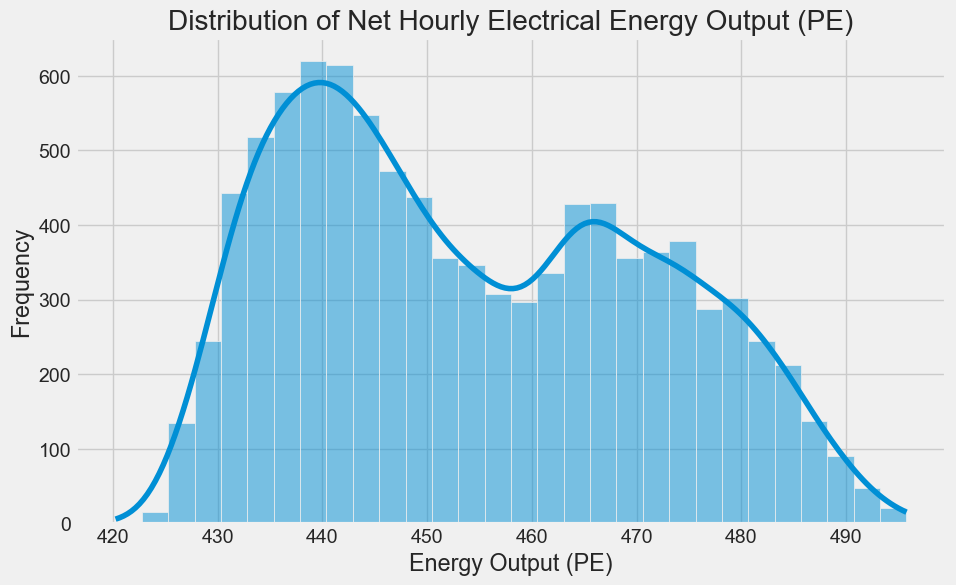

In [15]:
# 1. Distribution of the Target Variable (PE)
plt.figure(figsize=(10, 6))
sns.histplot(df['PE'], bins=30, kde=True)
plt.title('Distribution of Net Hourly Electrical Energy Output (PE)')
plt.xlabel('Energy Output (PE)')
plt.ylabel('Frequency')
plt.show()

The distribution of the energy output (PE) is roughly a normal distribution, slightly skewed to the left. There are no extreme outliers.


Generating pairplot to visualize relationships...


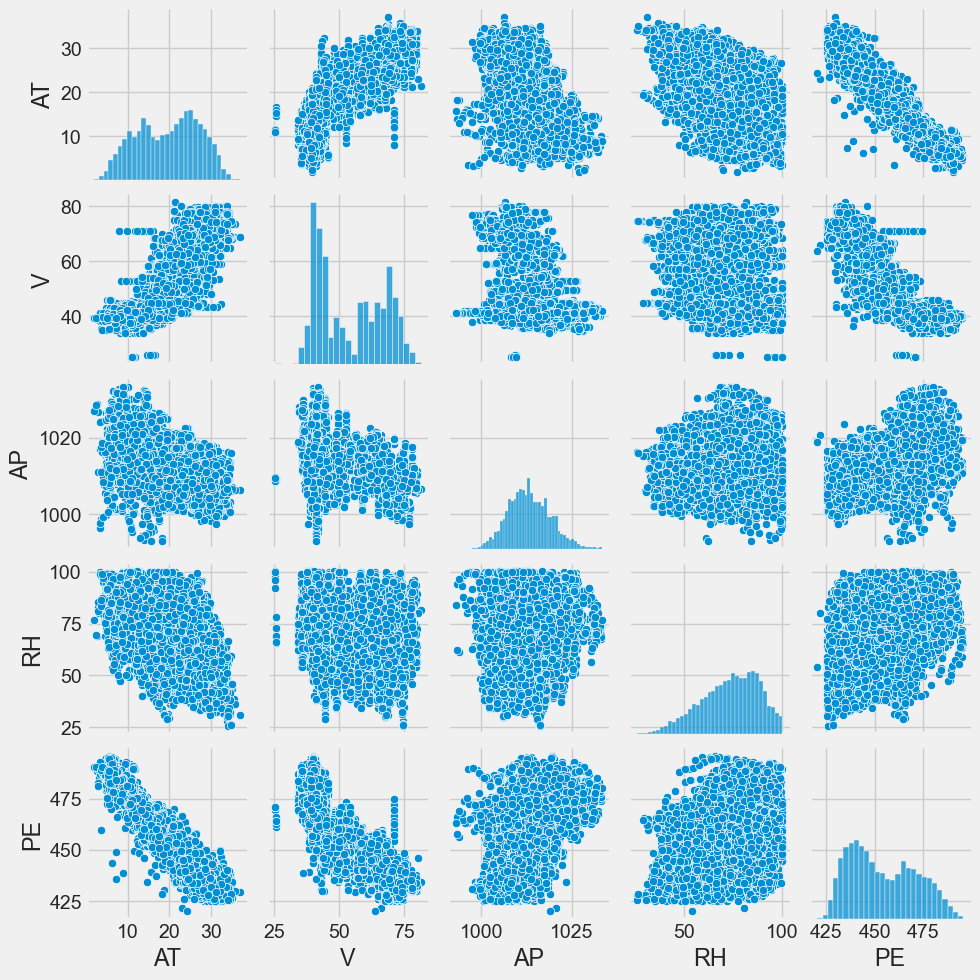

In [18]:
# Pairplot to visualize relationships (A pairplot is perfect here because we have a small number of numerical variables.)
print("\nGenerating pairplot to visualize relationships...")
sns.pairplot(df, height=2)
plt.show()

AT vs. PE: There is a very strong, clear negative linear relationship. As Ambient Temperature (AT) increases, Energy Output (PE) decreases.

V vs. PE: There is also a strong negative linear relationship between Exhaust Vacuum (V) and Energy Output (PE).

AP and RH: These features have weaker, less distinct relationships with PE.

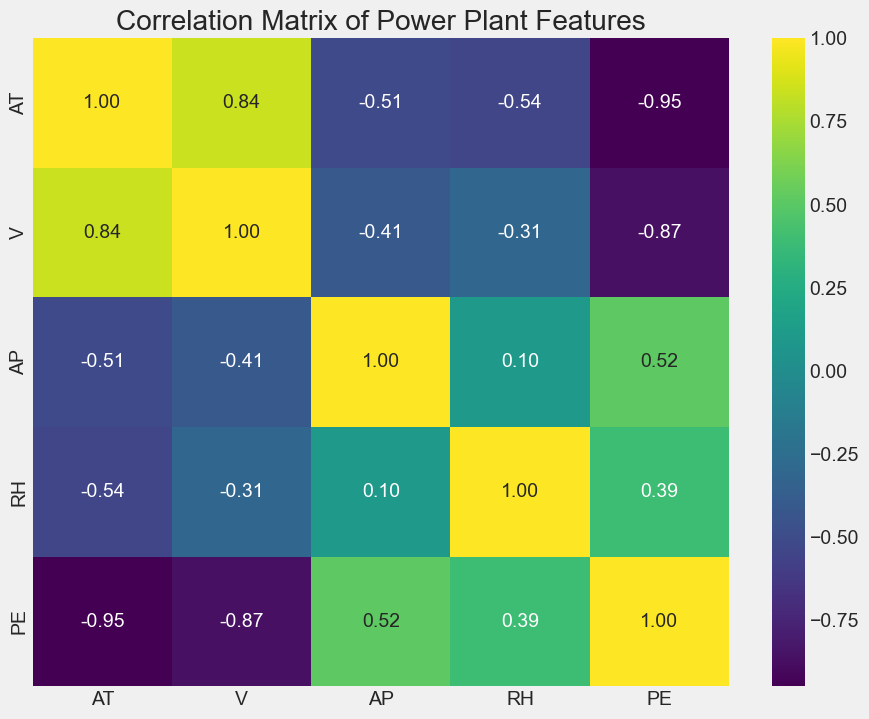

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Power Plant Features')
plt.show()

In [23]:
# Define Features (X) and Target (y)
X = df.drop('PE', axis=1)
y = df['PE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully split and scaled.")

Data successfully split and scaled.


In [25]:
# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


In [27]:
# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 3.60
Mean Squared Error (MSE): 20.27
R-squared (R²): 0.93


An $R^2$ of 0.93 is an outstanding result! This means our model can explain 93% of the variance in the power plant's energy output. The scatter plot confirms this, with the points tightly clustered around the red line, indicating highly accurate predictions.

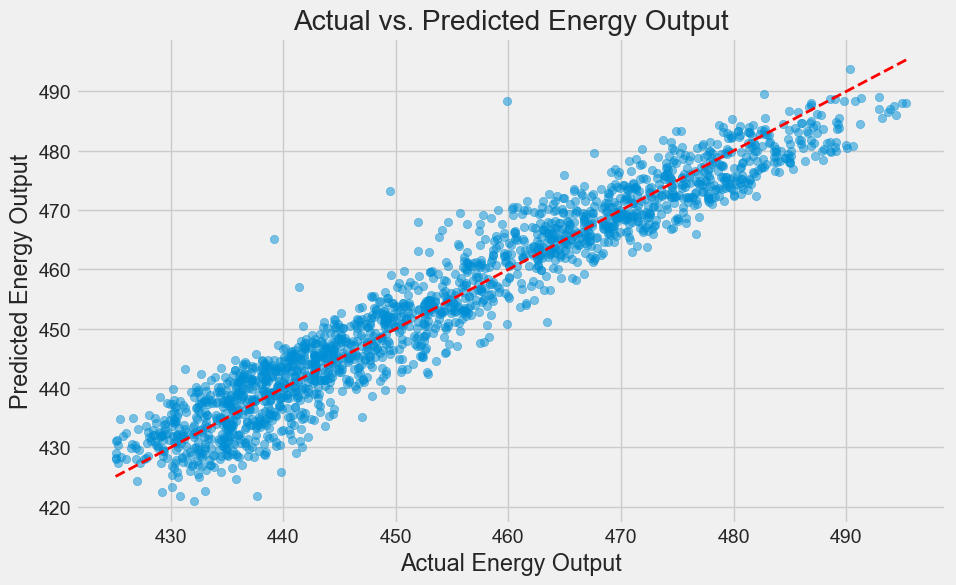

In [29]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Energy Output")
plt.ylabel("Predicted Energy Output")
plt.title("Actual vs. Predicted Energy Output")
plt.show()

In [32]:
# Create a DataFrame to view the coefficients
# We use the original column names for interpretability
coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeffs.sort_values(by='Coefficient', ascending=False))

    Coefficient
AP     0.369780
RH    -2.312196
V     -2.949632
AT   -14.763927


Most Important Factors: The coefficients confirm our EDA findings. Ambient Temperature (AT) and Exhaust Vacuum (V) have the largest negative coefficients by a significant margin. This means they are the primary drivers of energy output. As temperature or vacuum increases, the plant's efficiency and output decrease.

Model Suitability: The incredibly high $R^2$ score demonstrates that the relationships between these environmental variables and energy output are fundamentally linear. This makes Linear Regression a perfectly suited and highly effective model for this problem.

Practical Application: This model could be used by plant operators to forecast energy output based on weather predictions, helping them plan for grid demand and optimize plant operations.